<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 1

This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [71]:
plt.style.use('fivethirtyeight')

# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

# Code inspired by lectures by Mario Javier Carillo

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [72]:
sleep = pd.read_csv('~/Desktop/ECON628-01-rjmaller 2/datasets/sleep/sleep_bh.csv') 

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [73]:
#sleep.head(2)
# Counting cells with missing values
print "The number of cells with missing values is ", sum(sleep.isnull().values.ravel())
# Counting rows that have missijng values somewhere
print "The number of rows with missing values is ", sum([True for idx, row in sleep.iterrows() if any(row.isnull())])
sleep.isnull().sum()
sleep.info()
# Code inspired by 'Full Analysis' lecture by Mario Javier Carillo

The number of cells with missing values is  348
The number of rows with missing values is  174
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 n

In [74]:
sleep = sleep.dropna()

## 3. Check for correlations
    Implement a heatmap
---

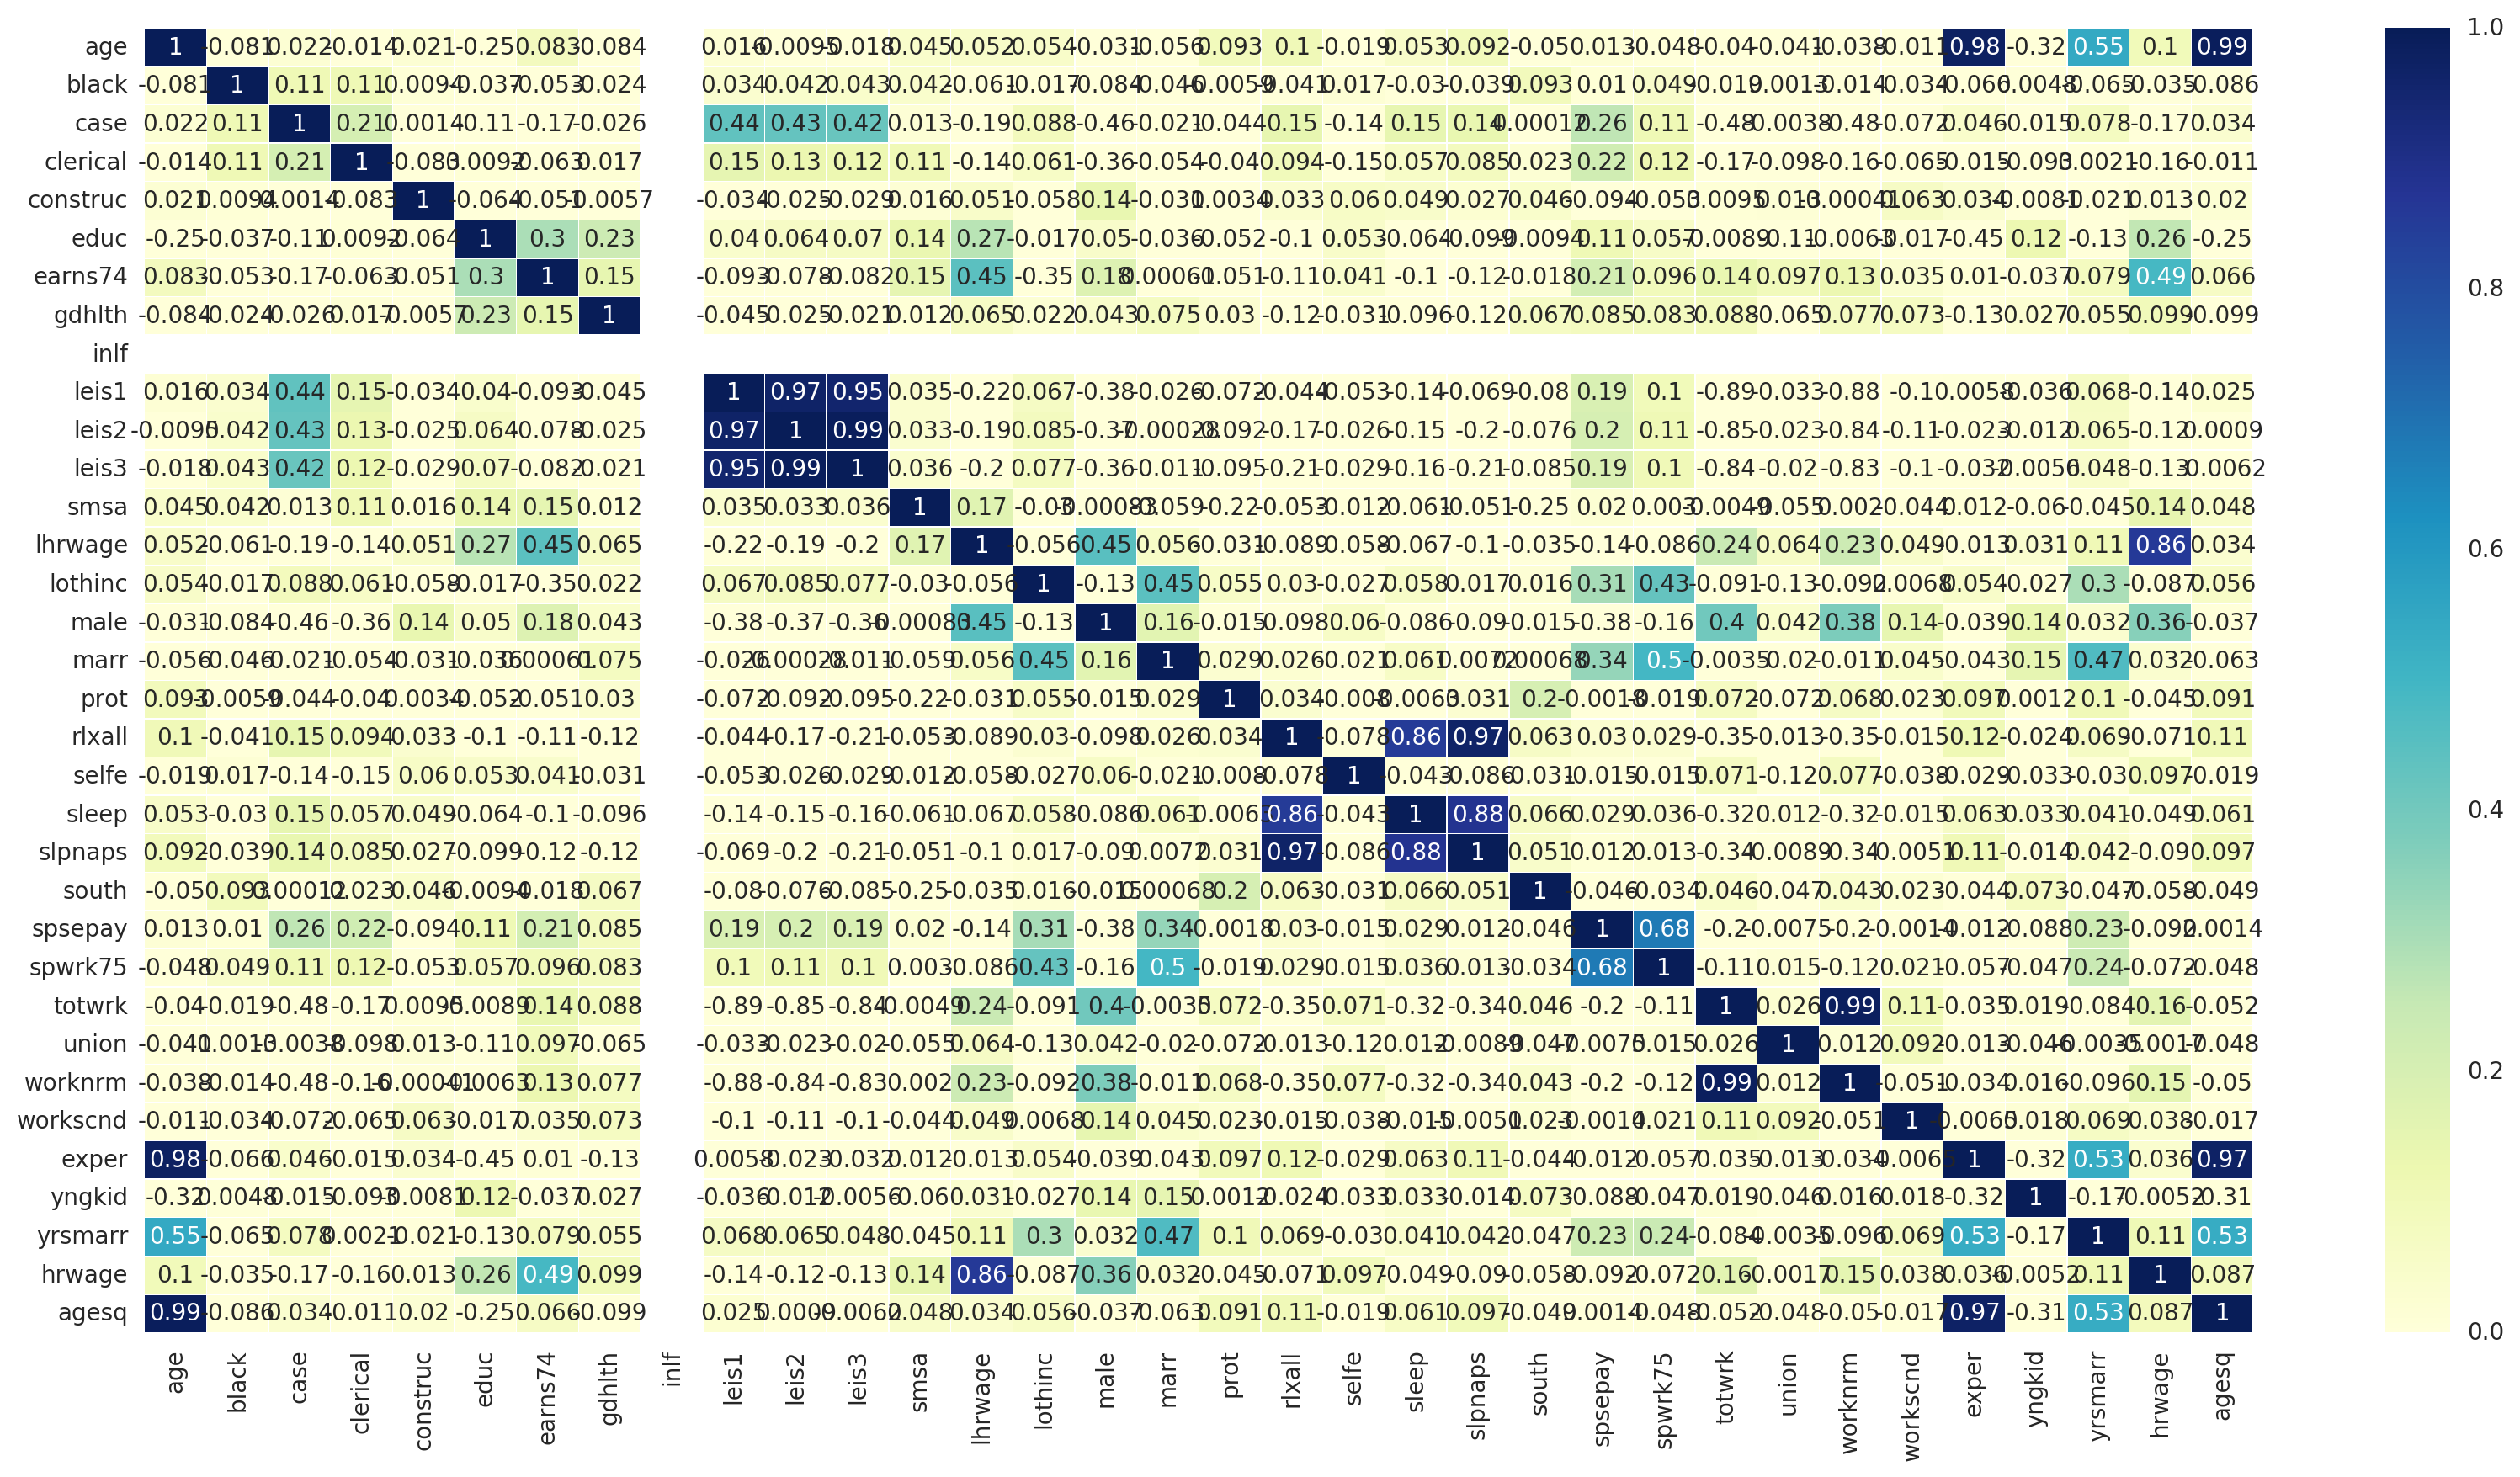

In [75]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(sleep.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()
# Code inspired by 'Full Analysis' lecture by Mario Javier Carillo

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [114]:
## Define y
y = sleep['sleep']
## Define X (exclude inc, incsq, log_inc)
columns_ = sleep.columns.tolist()
exclude_cols = ['sleep', 'slpnaps', 'case', 'lothi', 'nc', 'rlxall', 'leis1', 'leis2','leis3']
X = sleep[[i for i in columns_ if i not in exclude_cols]]
# Standardize X
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize
# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)
## Print shapes of y and X
print y.shape, X.shape
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

(532,) (532, 27)


In [118]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

(372, 27) (372,)
(160, 27) (160,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [120]:
from sklearn.linear_model import LinearRegression
## define a linear regression model
lr = LinearRegression()
## fit your model
lr.fit(X_train, y_train)
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
#Print coefficients from OLS model
lr.coef_

array([ -1.18509364e+00,  -8.62059072e+01,   7.17301078e+01,
         9.54749031e+01,  -2.05774788e+00,  -2.29632735e-03,
        -9.00160374e+01,  -2.66453526e-15,  -4.26390915e+01,
        -6.85493337e+00,  -9.34242368e-01,  -1.88826529e+01,
         1.30493379e+02,   1.64627332e+01,  -4.83101868e+01,
         8.61737661e+01,  -1.23016141e-03,   1.48921136e+01,
        -1.35906030e-01,   5.56539577e+01,  -4.09802701e-02,
        -9.49257601e-02,   8.72654243e-01,   5.08225181e+01,
        -2.24392906e+00,   8.63368259e+00,   4.72874542e-02])

In [122]:
# Evaluate Performance of OLS model on the train and test data set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [123]:
#Function that calls the MSE and R^2 at once, using the name of the method and calling the best model
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

In [34]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.00, test data: 0.00
R^2 OLS train data: 1.00, test data: 1.00


R^2 = 1 and MSE = 0, which is unrealistic. This is a red flag for perfect colinearity. One of my independent (x) variables is perfectly correlated with my dependent (y) variable. I'm excluding all variables that could be perfectly correlated with sleep: 'sleep', 'slpnaps', 'case', 'lothi', 'nc', 'rlxall', 'leis1', 'leis2','leis3'. But I must need to exclude other variables. I am correctly using Python code to evaluate the data using an OLS model according to the instructions but I have mispecified the model. I am including independent variables which should be excluded. Further analysis is necessary.

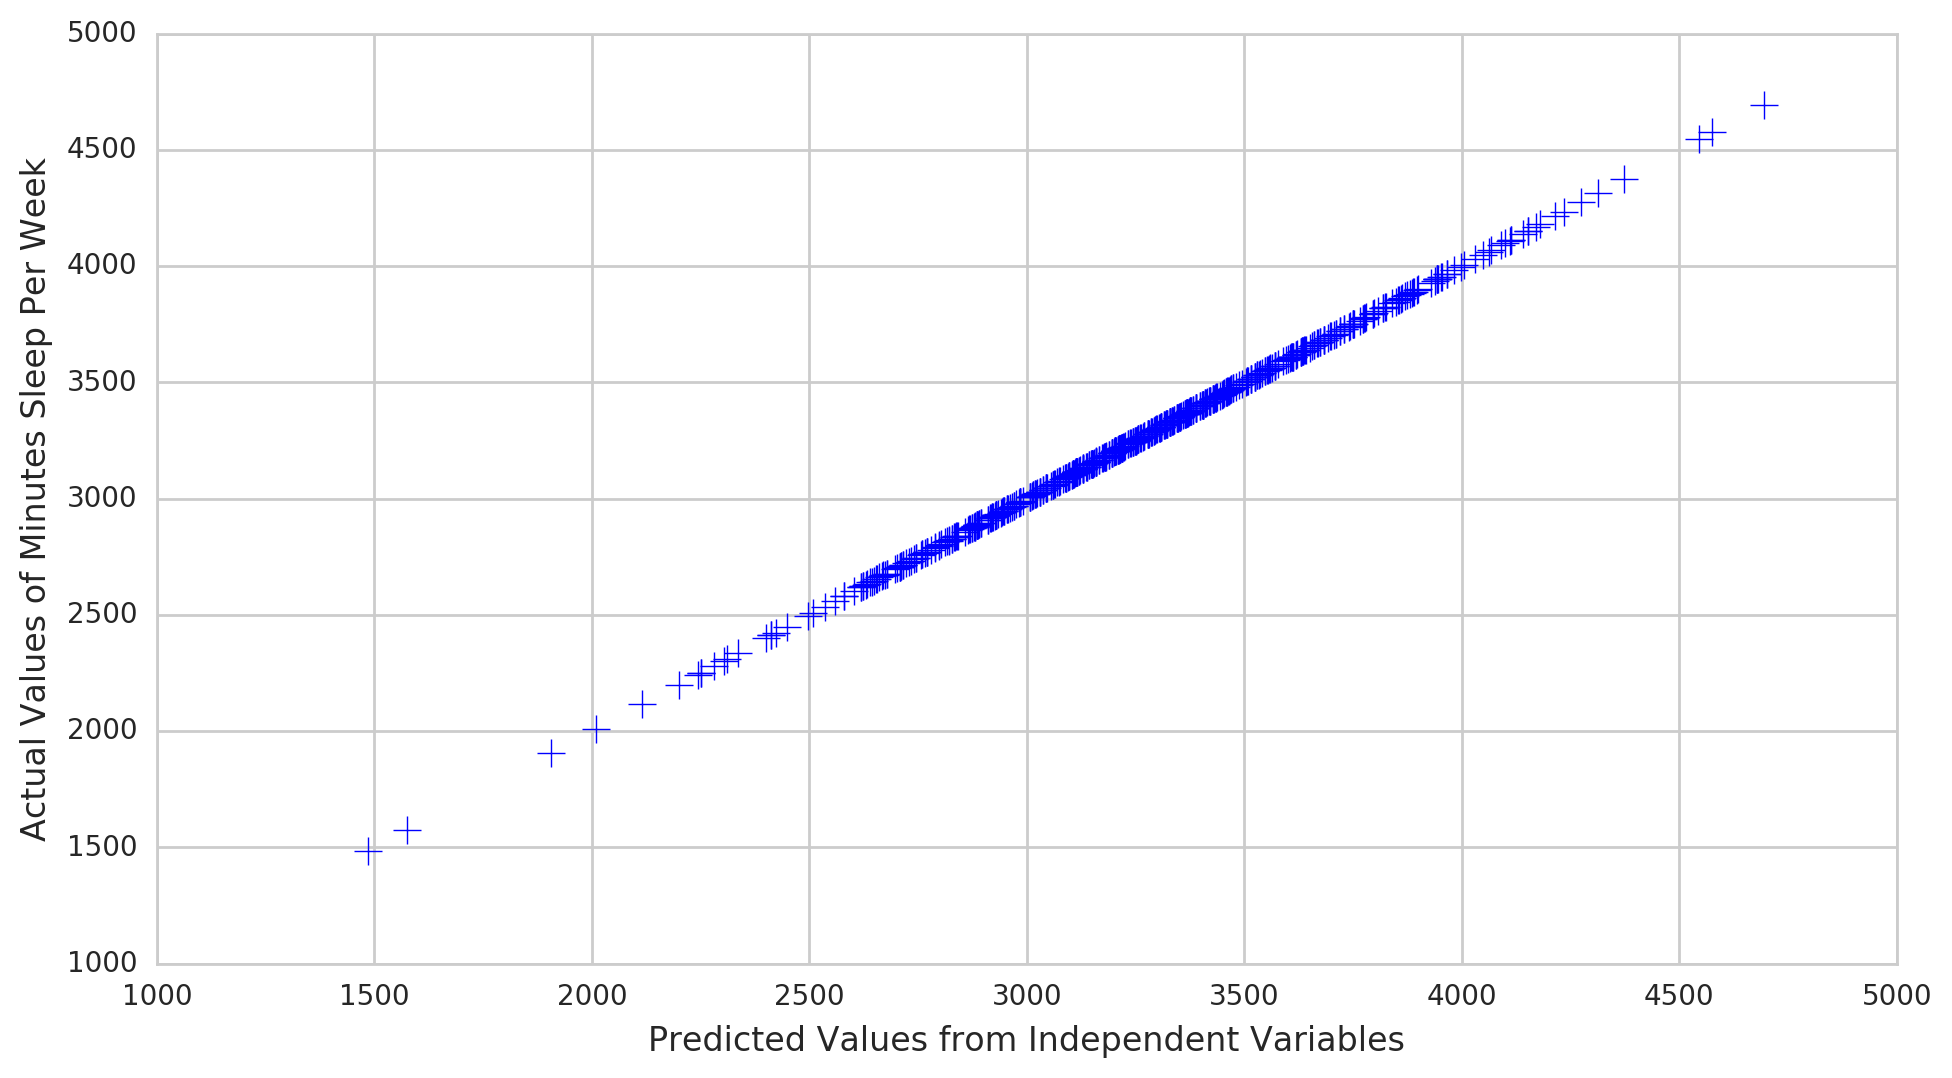

MSE: 1.15401024556e-23


In [54]:
##* Graph your predicted and y values
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from Independent Variables")
plt.ylabel("Actual Values of Minutes Sleep Per Week")
plt.show()
print "MSE:", mean_squared_error(y, predictions)
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

## 4.2.2 Regularization
    
---

In [124]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
## Find the optimal alpha for ridge regression
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)
# Code inspired by 'OLS Analysis' lecture by Mario Javier Carillo

100000.0


In [86]:
## Fit the Ridge regression
ridge.fit(X_train, y_train)
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)


MSE Ridge train data: 161264.32, test data: 166175.60
R^2 Ridge train data: 0.14, test data: 0.07


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

32.6131204978


In [125]:
## Find the optimal alpha for lasso regression
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

2830.9452186


...........................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [126]:
## fit your regression
lasso.fit(X_train, y_train)
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 163661.44, test data: 169633.94
R^2 Lasso train data: 0.13, test data: 0.05


In [127]:
## Find the optimal alphas for Elastic Net 
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

158889.553656
0.01


In [ ]:
## Fit your model
enet.fit(X_train, y_train)
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

In [87]:
## fit your regression
lasso.fit(X_train, y_train)
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

MSE Lasso train data: 165335.54, test data: 166447.82
R^2 Lasso train data: 0.12, test data: 0.07


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

40.1507219216
1.0


In [128]:
## Fit your model
enet.fit(X_train, y_train)
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 164096.10, test data: 167183.00
R^2 Elastic Net train data: 0.13, test data: 0.06


In [130]:
# Which Regularization method works best?
# Print the Coefficients
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

In [91]:
# Which Regularization method works best?
# Print the Coefficients for Ridge Regression
best_reg_method(X, ridge)

,abs_coef,coef,variable
18,52.254590,-52.254590,totwrk
20,51.135887,-51.135887,worknrm
15,19.174496,19.174496,south
6,16.597217,-16.597217,gdhlth
12,14.667348,14.667348,marr
2,12.976217,12.976217,clerical
8,11.050396,-11.050396,smsa
5,10.802816,-10.802816,earns74
14,10.543069,-10.543069,selfe
11,10.369461,-10.369461,male


In [92]:
# Which Regularization method works best?
# Print the Coefficients for Lasso 
best_reg_method(X, lasso)

,abs_coef,coef,variable
18,126.253383,-126.253383,totwrk
15,7.963200,7.963200,south
0,0.000000,0.000000,age
14,0.000000,-0.000000,selfe
25,0.000000,-0.000000,hrwage
24,0.000000,0.000000,yrsmarr
23,0.000000,0.000000,yngkid
22,0.000000,0.000000,exper
21,0.000000,-0.000000,workscnd
20,0.000000,-0.000000,worknrm


In [93]:
# Which Regularization method works best?
# Print the Coefficients for the Elastic Net regularization method
# The Elastic net combines aspects of the Lasso and Ridge Regeression Methods
best_reg_method(X, enet)

,abs_coef,coef,variable
18,117.483446,-117.483446,totwrk
15,0.266349,0.266349,south
0,0.000000,0.000000,age
14,0.000000,-0.000000,selfe
25,0.000000,-0.000000,hrwage
24,0.000000,0.000000,yrsmarr
23,0.000000,0.000000,yngkid
22,0.000000,0.000000,exper
21,0.000000,-0.000000,workscnd
20,0.000000,-0.000000,worknrm


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [ ]:
# The Ridge regularization method identifies too many coefficients. It overfits the data. The Lasso and Elastic Net 
# Regularization methods strike a better balance between bias and variance. 
# The Lasso and Elastic Net regularization methods identify:
# Total Work Hours per Week and Living in the South as the best predictors of minuntes of sleep at night per week
# All other coefficients go to zero with the Lasso and Elastic Net regularization methods.

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [131]:
## Create and Gridsearch a Regression Tree using Sci Kit Learn
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
##  Create gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7,10],
           "criterion" : ['mse']
         }

#Crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=1)

In [132]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    6.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7, 10], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [133]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 7}


best score -0.0372607722657


In [134]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [100]:
feature_importance(X, dtr_best)

,feature,importance
18,totwrk,0.387153
20,worknrm,0.290283
22,exper,0.129348
16,spsepay,0.113369
12,marr,0.059291
10,lothinc,0.020557
0,age,0.000000
15,south,0.000000
25,hrwage,0.000000
24,yrsmarr,0.000000


In [101]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2421.        ,  3582.9       ,  3251.67021277,  3190.575     ,
        3251.67021277,  3582.9       ,  3190.575     ,  3456.85416667,
        3190.575     ,  3190.575     ,  3190.575     ,  3251.67021277,
        3190.575     ,  2984.88461538,  3190.575     ,  3582.9       ,
        3190.575     ,  3190.575     ,  2984.88461538,  3190.575     ,
        3190.575     ,  3190.575     ,  3190.575     ,  3190.575     ,
        3582.9       ,  3251.67021277,  3190.575     ,  3251.67021277,
        3251.67021277,  3251.67021277,  3456.85416667,  2984.88461538,
        3251.67021277,  3190.575     ,  3456.85416667,  3190.575     ,
        3456.85416667,  3251.67021277,  3251.67021277,  3190.575     ,
        3251.67021277,  3251.67021277,  3190.575     ,  2984.88461538,
        3456.85416667,  3251.67021277,  3190.575     ,  3251.67021277,
        3190.575     ,  3190.575     ,  3190.575     ,  3456.85416667,
        3190.575     ,  3836.23076923,  3190.575     ,  3190.575     ,
      

In [102]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 145177.53, test data: 200200.34
R^2 Regression tree train data: 0.23, test data: -0.12


In [104]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

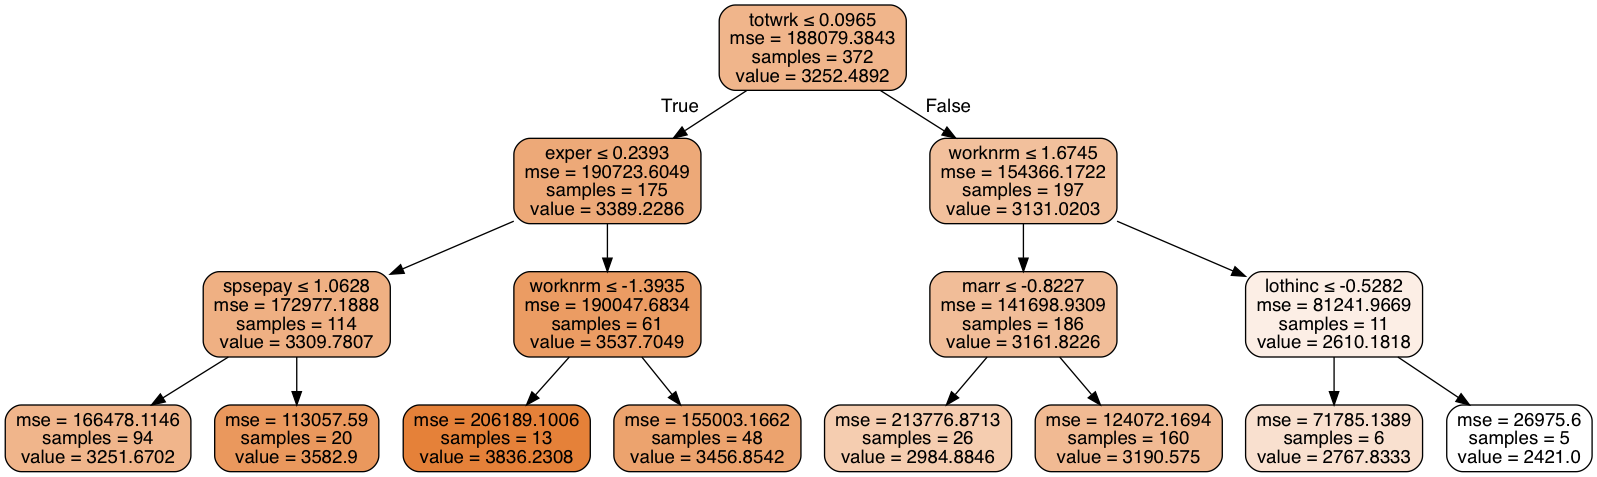

In [105]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [135]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

# Define hyperparameters
params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }
# Gridsearch parameters
estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

In [136]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   53.3s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [137]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 4}


best score 0.0319674989266


In [109]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
18,totwrk,0.379779
20,worknrm,0.259657
24,yrsmarr,0.052533
4,educ,0.041842
10,lothinc,0.040697
22,exper,0.036787
25,hrwage,0.034694
9,lhrwage,0.024408
5,earns74,0.018088
16,spsepay,0.016504


In [138]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2680.17683203,  3469.83779223,  3339.58117089,  3133.40907214,
        3273.14146077,  3292.38110409,  3171.65202809,  3411.38772085,
        3145.87473328,  3209.68171128,  3184.39926155,  3337.15906064,
        3194.84732418,  3108.38799192,  3247.32209632,  3582.21294344,
        3115.57761692,  3149.7383992 ,  3190.89155978,  3177.29753097,
        3211.38640441,  3184.36357297,  3147.45947581,  3175.9884466 ,
        3447.68647444,  3538.73332183,  3147.30886982,  3325.68887889,
        3394.92435162,  3258.61325961,  3271.5002694 ,  3183.7425251 ,
        3258.68642232,  3167.63300336,  3440.41837435,  3086.22845005,
        3443.66895559,  3357.97231944,  3265.3978358 ,  3184.84123708,
        3293.022914  ,  3274.8914479 ,  3204.67490968,  3104.11081576,
        3475.77999487,  3519.14505686,  3206.88784382,  3402.77833236,
        3168.06857314,  3147.36767258,  3260.08617342,  3305.60457296,
        3063.15149196,  3570.98845996,  3213.83185134,  3229.61634604,
      

In [139]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 135731.95, test data: 170573.38
R^2 Random Forest Regression tree train data: 0.28, test data: 0.05


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

To evaluate which model performs best we look for the model that yields the highest R^2 and the Mean Square Error closest to zero.
The OLS model far outperforms the regression tree and regression tree forest models. The R^2 = 1 and MSE = 0 are perfect for the OLS model. The R^2 = -.12 for the test data for the regression tree. That is terrible. The MSE for the test data is 200200.34. That is also terrible. The Random Tree Forest performs slightly better than the Regression tree model but it still isn't good. R^2 = .05 and and MSE = 170573.38. Clearly, the OLS model outperforms all other models we have considered.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:

We would always expect a tradeoff between bias and variance in every model. Models with less bias generally have greater variance and models with less variance have more bias. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

The OLS model has a R^2 of 1 so we would suspect it suffers from overfitting and performs poorly but we see no tradeoff between variance and bias in this case. Very surprising. R^2 and MSE should suffer in the test data when they are perfect on training data but for OLS in this case both test and train MSE and R^2 are perfect.

Quoted from Mario Javier Carillo's Lecture on OLS:
Model suffers from underfitting => high bias (model is not complex enough to capture patterns on our train data, suffers from low perfomance
Here lies the bias-variance tradeoff, but we can tune the complexity of the model via regularization
Regularization handles multicollinearity, filters out noise from data, eventually will prevent overfitting
Regularization the idea is to introduce additional information (bias) to penalize extreme parameter weights
Two issues: choosing the form of the regularization, and choosing the amount of regularization.